170498071/170498071 [==============================] - 167s 1us/step
Epoch 1/10
1563/1563 [==============================] - 76s 45ms/step - loss: 1.5223 - accuracy: 0.4439 - val_loss: 1.2250 - val_accuracy: 0.5572
Epoch 2/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.1661 - accuracy: 0.5861 - val_loss: 1.0731 - val_accuracy: 0.6201
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0243 - accuracy: 0.6411 - val_loss: 1.0107 - val_accuracy: 0.6432
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9266 - accuracy: 0.6763 - val_loss: 0.9635 - val_accuracy: 0.6664
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8554 - accuracy: 0.6995 - val_loss: 0.9331 - val_accuracy: 0.6742
Epoch 6/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.7927 - accuracy: 0.7215 - val_loss: 0.9181 - val_accuracy: 0.6782
Epoch 7/10
1563/1563 [==============================] -

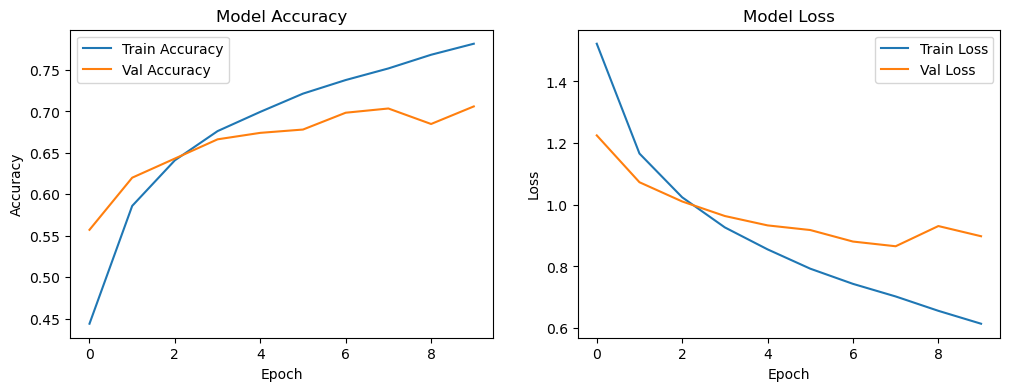

In [1]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load and Preprocess Data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-dimensional array
y_train = y_train.flatten()
y_test = y_test.flatten()

# Step 3: Define Class Names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Step 4: Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Step 6: Train the Model
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Step 8: Plot Accuracy and Loss Curves
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()